In [1]:
import os
import tarfile
from six.moves import urllib
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [127]:
X = np.array(housing["median_income"]).reshape(-1,1)
yval = np.array(housing["median_house_value"])
y = (yval > 2.5 ).astype(np.int)

print( X.shape, y.shape )

#index = np.argwhere(np.isnan(X))
#print( index)
#np.delete( y, index)
#np.delete( X, index)

(20640, 1) (20640,)


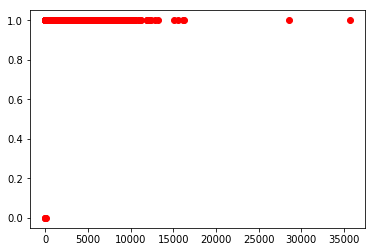

In [128]:
import matplotlib.pyplot as plt
plt.plot( X, y, 'ro')

In [95]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Text(0, 0.5, 'probability')

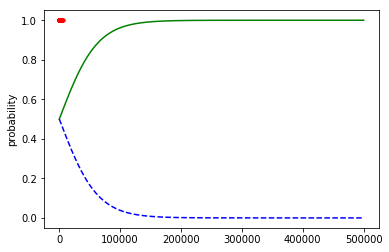

In [119]:
X_new = np.linspace(0, 500000, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X,y == 1,'r.')
plt.plot(X_new, y_proba[:, 1], "g-", label="Near Bay")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Near Bay")
plt.ylabel('probability')

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=1,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X, yval)


Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Text(0, 0.5, 'y')

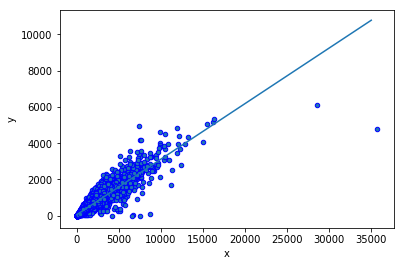

In [130]:

X_test = np.linspace(0, 35000, 1000)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.scatter(X, yval, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
